<html>
<head>
    <style>
        hr {
            border: none;
            border-top: 2px solid black;
            margin: 20px 0;
        }
    </style>
</head>
    <img src="https://img.freepik.com/vetores-premium/fundo-de-linhas-de-contorno-do-mapa-topografico_389675-150.jpg" width="250"       style="float: right; margin-left: 10px;">
    <hr>
    <span style="font-family: 'TIMES', sans-serif; font-weight: bold; font-size: 22px; display: block";>Análise de dados</span>
    <span style= "font-family: 'TIMES', sans-serif; display: block">Gráficos do espectrofluorímetro</span>
    <span style="font-family: 'TIMES', sans-serif;display: block">Autor: Carlos Eduardo Gonçalves Santos</span>
    <hr>
</html>

**Neste experimento analisamos:**

**EX Wavelength (comprimento de onda de excitação):** varia de 200 a 301 nm, nos dados deste experimento, e correspondem ao primeiro valor de cada linha.

**EM Wavelength (comprimento de onda de emissão):** são os comprimentos de onda registrados na linha que começa com `"EX Wavelength/EM Wavelength"`.

**Demais dados:** São as intensidades de fluorescência que correspondem a cada par de comprimento de onda de excitação e emissão.

**Importante:** Altere os limites dos intervalos citados a seguir, a fim de corresponder aos comprimentos de onda selecionados pela máquina.

## Gráfico 2D

- Caso seja de seu interesse um gráfico mais próximo daquele gerado pela máquina, utilize este código:

**Bibliotecas utilizadas:**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

filename = 'ICNB_S2_D.txt'

**Tratamento do arquivo txt:**
- O arquivo txt, respectivo aos dados do espectrofluorímetro utilizado, possui informações da máquina em suas primeiras linhas. Esta parte do código considera apenas os valores numéricos (que estão após "EX Wavelength/EM Wavelength").

In [2]:
data = []
em_wavelengths = []

# Abrir o arquivo e ignorar as linhas até encontrar "EX Wavelength/EM Wavelength"
with open(filename, 'r') as file:
    process_data = False  # Flag para indicar quando começar a processar os dados

    for line in file:
        if line.startswith('"EX Wavelength/EM Wavelength"'):
            # Extrair os comprimentos de onda EM
            em_wavelengths = [float(w) for w in line.strip().split(',')[1:] if w]
            process_data = True  # Ativar a leitura dos dados a partir daqui
            continue  # Ir para a próxima linha

        if process_data:
            values = line.strip().split(',')
            if all(val.replace('.', '', 1).isdigit() for val in values[1:] if val):
                # Adicionar os dados de intensidade como floats
                data.append([float(val) for val in values[1:] if val])

**Conversão de dados:**
- Esta parte do código converte os dados para um array, os normaliza e gera os comprimentos de onda de excitação.
- caso não queira normalizar os dados, altere `data_normalized = data / max_intensity` para `data_normalized = data`
- É importante que você altere esta parte, para colocar o intervalo dos comprimentos de onda utilizados em seu experimento.

In [3]:
# Converter os dados para array NumPy
data = np.array(data)

# Normalizar os dados
max_intensity = np.max(data)
data_normalized = data / max_intensity

# Gerar os comprimentos de onda de excitação (EX)
ex_wavelengths = np.linspace(200, 301, data.shape[0])

**Plot do gráfico:**
- Caso necessário, altere o limite dos eixos.

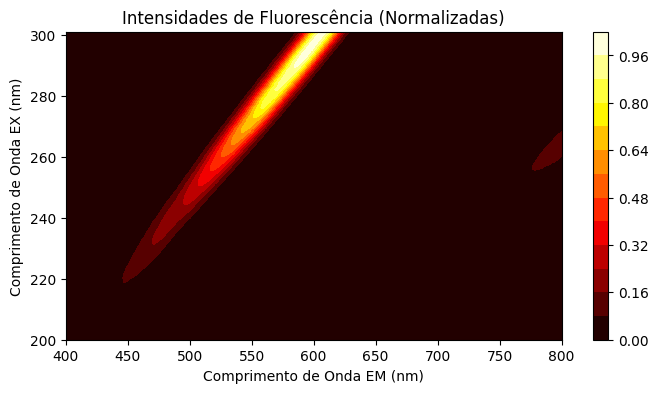

In [4]:
# Plotar gráfico de contorno com dados normalizados
plt.figure(figsize=(8, 4))
levels = 15  # Ajuste para suavizar o degradê
contour = plt.contourf(em_wavelengths, ex_wavelengths, data_normalized, levels=levels, cmap='hot')
plt.colorbar(contour)
plt.title('Intensidades de Fluorescência (Normalizadas)')
plt.xlabel('Comprimento de Onda EM (nm)')
plt.ylabel('Comprimento de Onda EX (nm)')

# Ajustar limites dos eixos
plt.xlim(min(em_wavelengths), max(em_wavelengths))
plt.ylim(200, 301)

# Salvar o gráfico como imagem
plt.savefig('Espectrofluorímetro_Normalizado.png')
plt.show()

## Gráfico 3D
- Caso seja de seu interesse uma visualização tridimensional dos dados, utilize este código:

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importar a classe para gráficos 3D

filename = 'ICNB_S2_D.txt'

**Tratamento do arquivo txt:**
- O arquivo txt, respectivo aos dados do espectrofluorímetro utilizado, possui informações da máquina em suas primeiras linhas. Esta parte do código considera apenas os valores numéricos (que estão após "EX Wavelength/EM Wavelength").

In [6]:
data = []
em_wavelengths = []

# Abrir o arquivo e ignorar as linhas até encontrar "EX Wavelength/EM Wavelength"
with open(filename, 'r') as file:
    process_data = False  # Flag para indicar quando começar a processar os dados

    for line in file:
        if line.startswith('"EX Wavelength/EM Wavelength"'):
            # Extrair os comprimentos de onda EM
            em_wavelengths = [float(w) for w in line.strip().split(',')[1:] if w]
            process_data = True  # Ativar a leitura dos dados a partir daqui
            continue  # Ir para a próxima linha

        if process_data:
            values = line.strip().split(',')
            if all(val.replace('.', '', 1).isdigit() for val in values[1:] if val):
                # Adicionar os dados de intensidade como floats
                data.append([float(val) for val in values[1:] if val])

**Conversão de dados:**
- Esta parte do código converte os dados para um array, os normaliza e gera os comprimentos de onda de excitação.
- caso não queira normalizar os dados, altere `data_normalized = data / max_intensity` para `data_normalized = data`
- É importante que você altere esta parte, para colocar o intervalo dos comprimentos de onda utilizados em seu experimento.

In [7]:
# Converter os dados para array NumPy
data = np.array(data)

# Normalizar os dados
max_intensity = np.max(data)
data_normalized = data / max_intensity

# Gerar os comprimentos de onda de excitação (EX)
ex_wavelengths = np.linspace(200, 301, data.shape[0])

**Plot do gráfico:**
- Esta parte do código define os eixos X, Y e Z, além de realizar o plot do gráfico.
- Caso necessário, altere o limite dos eixos.

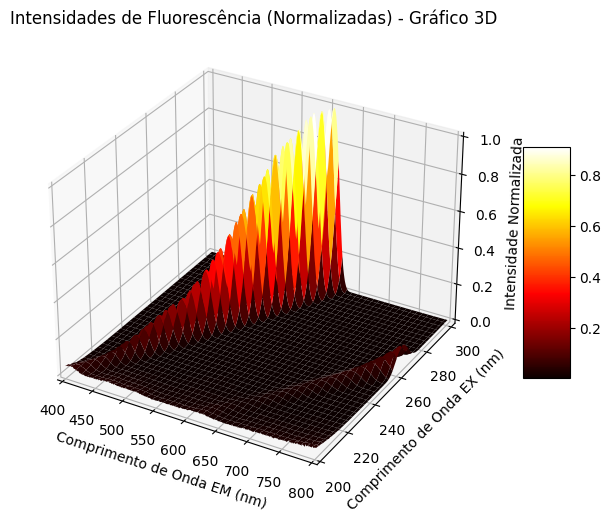

In [8]:
# Criar gráfico 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Criar uma grade para os dados
X, Y = np.meshgrid(em_wavelengths, ex_wavelengths)
Z = data_normalized

# Plotar a superfície
surf = ax.plot_surface(X, Y, Z, cmap='hot', edgecolor='none')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

ax.set_title('Intensidades de Fluorescência (Normalizadas) - Gráfico 3D')
ax.set_xlabel('Comprimento de Onda EM (nm)')
ax.set_ylabel('Comprimento de Onda EX (nm)')
ax.set_zlabel('Intensidade Normalizada')

# Ajustar limites dos eixos
ax.set_xlim([min(em_wavelengths), max(em_wavelengths)])
ax.set_ylim([200, 301])
ax.set_zlim([0, 1])

# Salvar o gráfico como imagem
plt.savefig('Espectrofluorímetro_Normalizado_3D.png')
plt.show()